# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from nomeroff_net.pipes.number_plate_text_readers.base.ocr import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
PATH_TO_DATASET = "../../datasets/Rus"
NOMEROFF_NET_DIR = "/workspace/nomerov/nomeroff-net/data"
# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'../../datasets/Rus'

In [6]:
DATASET_NAME = "ru"
VERSION = "2021_09_01_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/workspace/nomerov/nomeroff-net/data/models/anpr_ocr_ru_2021_09_01_pytorch_lightning.ckpt'

In [8]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O",
                        "P", "T", "X", "Y"]

        # Train hyperparameters
        self.batch_size = 128
        self.epochs = 25
        self.gpus = 1

In [9]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=24)

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'7', '5', 'O', 'C', '0', 'Y', '4', 'P', 'T', '3', '2', 'A', '1', '8', 'H', 'M', 'E', '6', 'K', 'X', 'B', '9'}
Letters val  {'7', '5', 'C', 'O', '0', 'Y', '4', 'P', 'T', 'A', '3', '2', '1', '8', 'H', 'M', 'E', '6', 'K', 'X', 'B', '9'}
Letters test  {'7', '5', 'C', 'O', '0', 'Y', '4', 'P', 'T', '3', 'A', '2', '1', '8', 'H', 'M', 'E', '6', 'K', 'X', 'B', '9'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y
START BUILD DATA


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2845/2845 [00:00<00:00, 23571.14it/s]

DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
RESULT_MODEL_PATH = "model/model.pt"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/2469 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2469` reached.
Restoring states from the checkpoint path at /workspace/nomerov/nomeroff-net/.lr_find_b52c3117-4f09-459d-be30-202eafd33ffe.ckpt
Restored all states from the checkpoint file at /workspace/nomerov/nomeroff-net/.lr_find_b52c3117-4f09-459d-be30-202eafd33ffe.ckpt


Found lr: 0.04521952987954439


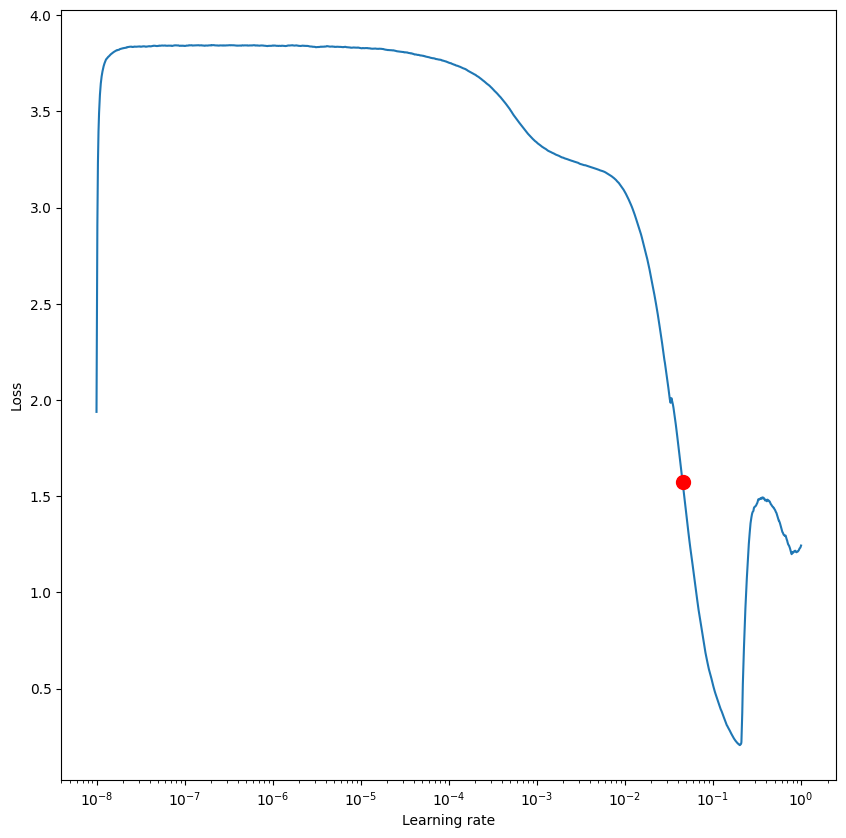

In [11]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [15]:
ocrTextDetector.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type       | Params
------------------------------------------------
0 | conv_nn          | Sequential | 2.8 M 
1 | linear1          | Linear     | 524 K 
2 | recurrent_layer1 | BlockRNN   | 139 K 
3 | recurrent_layer2 | BlockRNN   | 16.9 K
4 | linear2          | Linear     | 1.5 K 
5 | criterion        | CTCLoss    | 0     
------------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.863    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


[INFO] best model path /workspace/nomerov/data/logs/ocr/epoch=0-step=386.ckpt


NPOcrNet(
  (conv_nn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [21]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to model/model.pt


In [14]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [22]:
ocrTextDetector.test_acc(verbose=True)


[INFO] ../../datasets/Rus/test/img/K242CC178.png
Predicted: K242C178 			 True: K242CC178

[INFO] ../../datasets/Rus/test/img/O442AA142.png
Predicted: O442A12 			 True: O442AA142

[INFO] ../../datasets/Rus/test/img/B185BP05.png
Predicted: B685BP25 			 True: B185BP05

[INFO] ../../datasets/Rus/test/img/X222BY96.png
Predicted: X2223Y96 			 True: X222BY96

[INFO] ../../datasets/Rus/test/img/K700HY102.png
Predicted: K70HY102 			 True: K700HY102

[INFO] ../../datasets/Rus/test/img/H694KM161_0.png
Predicted: H694KMH161 			 True: H694KM161

[INFO] ../../datasets/Rus/test/img/O171YH64.png
Predicted: O171YH4 			 True: O171YH64

[INFO] ../../datasets/Rus/test/img/H425EE32.png
Predicted: H4425EE32 			 True: H425EE32

[INFO] ../../datasets/Rus/test/img/X144CC66.png
Predicted: X144CC6 			 True: X144CC66

[INFO] ../../datasets/Rus/test/img/E935HH78.png
Predicted: E933H78 			 True: E935HH78

[INFO] ../../datasets/Rus/test/img/E329KO48.png
Predicted: E329KO98 			 True: E329KO48

[INFO] ../../datasets/

0.983128295254833

In [ ]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

## than train with augumentation

In [10]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O",
                        "P", "T", "X", "Y"]
        
        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 25
        self.gpus = 1

In [11]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=12)

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'9', 'P', 'E', '0', 'H', 'K', 'T', '3', '1', 'M', 'O', '6', '7', 'B', 'C', '8', '4', '2', 'A', 'Y', '5', 'X'}
Letters val  {'9', 'P', 'E', '0', 'H', 'K', 'T', '3', '1', 'M', 'O', '6', '7', 'B', 'C', '8', '4', '2', 'A', 'Y', '5', 'X'}
Letters test  {'9', 'P', 'E', '0', 'H', 'K', 'T', '3', '1', 'M', 'O', '6', '7', 'B', 'C', '8', '4', '2', 'A', 'Y', '5', 'X'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [18]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
ocrTextDetector.load('/mnt/storage2/var/www/nomeroff-net.24/models/anpr_ocr_ru_2021_09_01_pytorch_lightning.ckpt.6')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [14]:
for i in range(7,12):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Global seed set to 7


Found lr: 0.12589254117941648


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 7


/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/data/logs/ocr/epoch=22-step=17755-v2.ckpt


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.006604663096368313}
--------------------------------------------------------------------------------


[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/A926AA113.png
Predicted: a926aa13 			 True: a926aa113

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E666PP123.png
Predicted: e66p123 			 True: e666pp123

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E499KP198.png
Predicted: o8499kp198 			 True: e499kp198

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/T962PP777.png
Predicted: t962p77

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 7


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648



Global seed set to 8


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/data/logs/ocr/epoch=22-step=17755-v3.ckpt


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.005009970162063837}
--------------------------------------------------------------------------------


[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E666PP123.png
Predicted: e66pp123 			 True: e666pp123

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E935HH78.png
Predicted: e920hh78 			 True: e935hh78

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/X125KX14.png
Predicted: x125kx1 			 True: x125kx14

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/H687OK52.png
Predicted: h687ok55 			 T

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 8


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648



Global seed set to 9


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>    

self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>Exception ignored in: Traceback (most recent call last):

Traceback (most recent call last):

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloa

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    Exception ignored in: if w.is

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/data/logs/ocr/epoch=24-step=19299-v3.ckpt


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.0060048783197999}
--------------------------------------------------------------------------------


[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E666PP123.png
Predicted: e666p123 			 True: e666pp123

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/B072PB32.png
Predicted: b372pb32 			 True: b072pb32

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E499KP198.png
Predicted: e49kp198 			 True: e499kp198

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/O777EE16.png
Predicted: o777ee116 			

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 9


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Global seed set to 10


Found lr: 0.12589254117941648


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 10


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>


Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers


    if w.is_alive():  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError
: can only test a child process

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError: can only test a child process

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
        if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160><function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can o

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive

    Traceback (most recent call last):
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

AssertionError    : self._shutdown_workers()can only test a child process

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr

    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>Traceback (most recent call last):

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
      File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
self._shutdown_workers()    
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>    
Traceback (most recent call last):
if w.is_alive():self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib64/python3.9/site-


AssertionError: AssertionErrorcan only test a child process: 
can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>: 
can only test a child processTraceback (most recent call last):

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()


  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>if w.is_alive():

Traceback (most recent call last):
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
        assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

AssertionError  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
:     can only test a child processif w.is_alive():

  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'Exception ignored in: 


AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>: 
can only test a child processTraceback (most recent call last):

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>




Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
        if w.is_alive():self._shutdown_workers()    

self._shutdown_workers()  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
        assert self._parent_pid == os.getpid(), 'can only test a child process'    if w.is_alive():
if w.is_alive():
AssertionError
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
:   Fi

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()


  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    

if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/data/logs/ocr/epoch=23-step=18527-v3.ckpt


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.005061792675405741}
--------------------------------------------------------------------------------


[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/A926AA113.png
Predicted: a926aa13 			 True: a926aa113

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E499KP198.png
Predicted: c69kp198 			 True: e499kp198

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/A459BY92.png
Predicted: a659by92 			 True: a459by92

[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E935HH78.png
Predicted: e938hh78 		

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs



[INFO] /mnt/storage2/var/www/nomeroff-net.24/NomeroffNet/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/X359KT16.png
Predicted: y359kt16 			 True: x359kt163
Testing Accuracy:  0.9919156414762742
model save to /mnt/storage2/var/www/nomeroff-net.24/models/anpr_ocr_ru_2021_09_01_pytorch_lightning.ckpt.10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 10


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Global seed set to 11


Found lr: 0.12589254117941648


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 11


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>: 
can only test a child processTraceback (most recent call last):

  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers


    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child processException ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

Traceback (most recent call last):


      File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
self._shutdown_workers()
      File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
self._shutdown_workers()
      File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
if w.is_alive():
      File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
Exception ignored in: assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
    
AssertionErrorassert self._parent_pid == os.getpid(), 'can only test a child process'Traceback (most recent call last):
: 
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
can only te

    if w.is_alive():


  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>AssertionError
: Traceback (most recent call last):
can only test a child process  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers


    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>
Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>AssertionError
: Traceback (most recent call last):
can only test a child process  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__

    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers


    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa7ee5d8160>


Traceback (most recent call last):
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib64/python3.9/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Exception ignored in: 